In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import accuracy_score
from sklearn.linear_model import *
from pandas import *
from datetime import date
from sklearn import *
from sklearn.impute import SimpleImputer

from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *

# load the data
df = pd.read_csv('/home/giang/Downloads/gianha/train.csv')
df_test = pd.read_csv('/home/giang/Downloads/gianha/test.csv') 

In [2]:
# thong tin
df.info()
df
# tong dong co null
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df = df.drop('Id',axis=1)
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']
results = x.columns
df = x

In [4]:
x.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
# chu va so
numerical_col = []
cat_col = []
for i in x.columns:
    if x[i].dtype == 'object':
        cat_col.append(i)
        print(i+': ' + str(len(x[i].unique())))
    else:
        numerical_col.append(i)
        
print('CAT col \n', cat_col)
print('Numerical col\n')
print(numerical_col)

MSZoning: 5
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinType2: 7
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
KitchenQual: 4
Functional: 7
FireplaceQu: 6
GarageType: 7
GarageFinish: 4
GarageQual: 6
GarageCond: 6
PavedDrive: 3
PoolQC: 4
Fence: 5
MiscFeature: 5
SaleType: 9
SaleCondition: 6
CAT col 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kitche

In [7]:
xx = pd.get_dummies(df.LotConfig)
xx

,Corner,CulDSac,FR2,FR3,Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,0,0,0,0,1


In [8]:
# chuyen doi bien phan loai thanh bien gia
xc = pd.get_dummies(x)
xc

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [9]:
for c in cat_col:
    le = LabelEncoder() 
    x[c] = le.fit_transform(list(x[c].values)) 


In [10]:
# x = xc
x.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
5,50,3,85.0,14115,1,2,0,3,0,4,...,0,0,3,2,2,700,10,2009,8,4
6,20,3,75.0,10084,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
7,60,3,NaN,10382,1,2,0,3,0,0,...,0,0,3,4,2,350,11,2009,8,4
8,50,4,51.0,6120,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2008,8,0
9,190,3,50.0,7420,1,2,3,3,0,0,...,0,0,3,4,4,0,1,2008,8,4


In [11]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,0,3,4,4,0,8,2007,8,4
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,0,3,2,4,0,2,2010,8,4
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,0,3,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,0,3,4,4,0,4,2010,8,4


In [12]:
# x = x.drop('SalePrice',axis=1)

In [13]:
# dien cac gia tri con thieu theo gia tri trung binh
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(x)
x = imputer.transform(x)
# y = imputer.transform(y[numerical_col])

In [14]:
# chuan hoa theo min max
scl = MinMaxScaler()
x = scl.fit_transform(x)
x

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 1.        ,
        0.8       ]])

In [15]:
x3 = pd.DataFrame(x)
x3

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.140411,0.030929,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.636364,0.25,1.0,0.8
1456,0.000000,0.75,0.219178,0.055505,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.5,1.0,0.00000,0.090909,1.00,1.0,0.8
1457,0.294118,0.75,0.154110,0.036187,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.5,0.16129,0.363636,1.00,1.0,0.8
1458,0.000000,0.75,0.160959,0.039342,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.272727,1.00,1.0,0.8


In [16]:
# chia tap ti le 8, 2
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size= 0.2, random_state = 42)

In [17]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [18]:
X_test

array([[0.        , 0.75      , 0.16780822, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.26369863, ..., 1.        , 1.        ,
        0.8       ],
       [0.05882353, 1.        , 0.11986301, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.23529412, 0.75      , 0.14383562, ..., 0.5       , 1.        ,
        0.8       ],
       [0.29411765, 0.75      , 0.13356164, ..., 0.75      , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.16780822, ..., 0.75      , 1.        ,
        0.8       ]])

In [19]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [20]:
clf = LinearRegression(normalize=True)
res = clf.fit(X_train, y_train)


In [21]:
scores = clf.score(X_test, y_test)
scores

0.8436229454048209

In [22]:
resS = res.predict(X_test)
resS[1]

320266.5503500427

In [23]:
y_test.values.tolist()
# df.values.tolist()

[154500,
 325000,
 115000,
 159000,
 315500,
 75500,
 311500,
 146000,
 84500,
 135500,
 145000,
 130000,
 81000,
 214000,
 181000,
 134500,
 183500,
 135000,
 118400,
 226000,
 155000,
 210000,
 173500,
 129000,
 192000,
 153900,
 181134,
 141000,
 181000,
 208900,
 127000,
 284000,
 200500,
 135750,
 255000,
 140000,
 138000,
 219500,
 310000,
 97000,
 114500,
 205000,
 119500,
 253293,
 128500,
 117500,
 115000,
 127000,
 451950,
 144000,
 119000,
 196000,
 115000,
 287000,
 144500,
 260000,
 213000,
 175000,
 107000,
 107500,
 68500,
 154000,
 317000,
 264132,
 283463,
 243000,
 109000,
 305000,
 93500,
 176000,
 118858,
 134000,
 109008,
 93500,
 611657,
 173000,
 348000,
 341000,
 141000,
 124900,
 118000,
 67000,
 113000,
 91300,
 149500,
 133000,
 266000,
 190000,
 155900,
 155835,
 153500,
 152000,
 124500,
 301000,
 136500,
 169990,
 205000,
 183900,
 204900,
 260000,
 163500,
 224900,
 244000,
 132000,
 194000,
 156500,
 156000,
 275000,
 145000,
 135000,
 60000,
 124000,
 1

In [24]:
print(mean_squared_error(y_test, clf.predict(X_test)))

1199463020.0641344


In [25]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
mape_ = mape(y_test, resS)
mape_

12.863089411673458

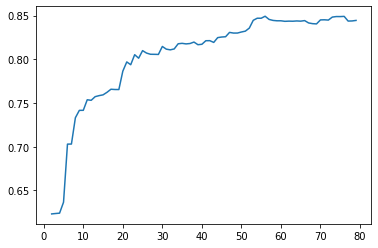

In [27]:
scores = []
x_temp = x
for i in range(2, 80):
    pca_ = PCA(i)
    x = pca_.fit_transform(x_temp)
    X_train , X_test , y_train , y_test = train_test_split(x , y , test_size= 0.2, random_state = 42)
    clf = LinearRegression(normalize=True)
    res = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.plot(range(2,80),scores) 
plt.show()

In [28]:
test_logits = np.argmax(scores, axis=-1)
test_logits = test_logits + 2
test_logits

56

In [29]:
scores[74]

0.8490388976765433

In [30]:
x3 = pd.DataFrame(x_temp)
x3

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.140411,0.030929,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.636364,0.25,1.0,0.8
1456,0.000000,0.75,0.219178,0.055505,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.5,1.0,0.00000,0.090909,1.00,1.0,0.8
1457,0.294118,0.75,0.154110,0.036187,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.5,0.16129,0.363636,1.00,1.0,0.8
1458,0.000000,0.75,0.160959,0.039342,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.272727,1.00,1.0,0.8


In [31]:
pca_ = PCA()
x = pca_.fit_transform(x_temp) 

# in ti le phuong sai
print(pca_.explained_variance_ratio_)
evr = pca_.explained_variance_ratio_
print("size = ",size(evr))
print(pca_.components_)

[1.72263508e-01 7.62957407e-02 5.83886344e-02 4.84306047e-02
 4.37674975e-02 4.26421107e-02 3.54773636e-02 3.39951734e-02
 3.21449781e-02 2.87120522e-02 2.49716211e-02 2.27547457e-02
 2.18379957e-02 1.96217574e-02 1.78389066e-02 1.74266121e-02
 1.65620846e-02 1.61813030e-02 1.47740985e-02 1.34178513e-02
 1.30573233e-02 1.20614063e-02 1.16405347e-02 1.07597956e-02
 1.04565298e-02 1.03483942e-02 9.66782119e-03 9.30233771e-03
 9.17504081e-03 8.60475211e-03 8.32432413e-03 8.25043202e-03
 7.49539628e-03 7.22785799e-03 6.64177790e-03 6.29420742e-03
 5.91256950e-03 5.86990130e-03 5.34001483e-03 5.18586695e-03
 4.85048300e-03 4.31959996e-03 4.03015985e-03 3.86500037e-03
 3.71280608e-03 3.45951109e-03 3.29244893e-03 3.14102738e-03
 3.10363131e-03 3.03584734e-03 2.81481569e-03 2.53354964e-03
 2.36161248e-03 2.26812373e-03 2.24197066e-03 2.06081374e-03
 2.05069401e-03 1.77883267e-03 1.69498819e-03 1.63781025e-03
 1.56346230e-03 1.34682575e-03 1.18244102e-03 1.10246461e-03
 9.92100268e-04 9.729058

<ipython-input-31-fdd8eb7a71e4>:7: DeprecationWarning: scipy.size is deprecated and will be removed in SciPy 2.0.0, use numpy.size instead
  print("size = ",size(evr))


(-3.9000000000000004, 81.9, -0.008613175403965041, 0.18087668348326585)

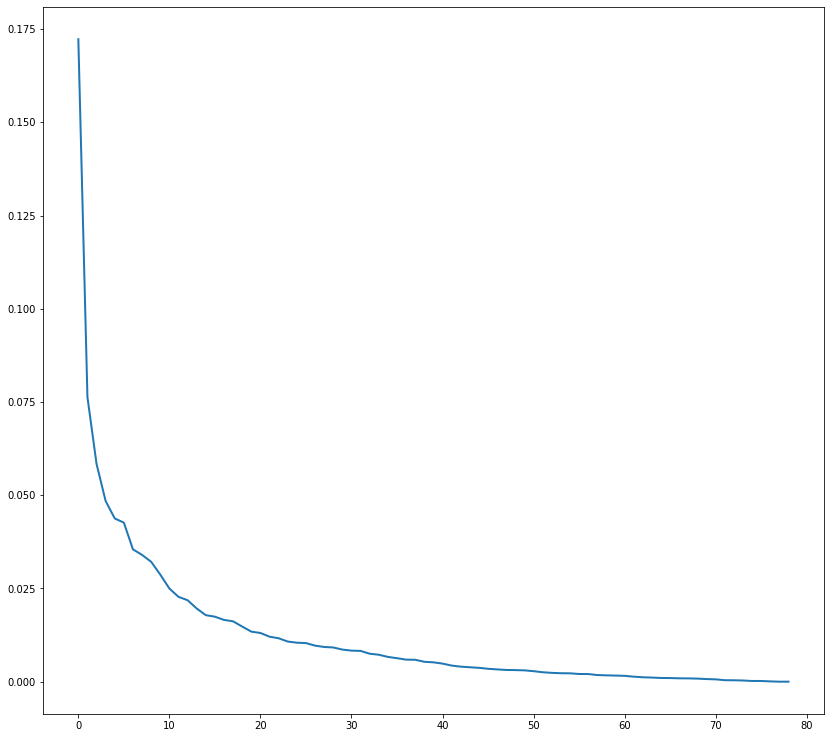

In [32]:
plt.figure(1, figsize=(14, 13))
plt.clf()
# plt.axes([.2, .2, .7, .7])
plt.plot(pca_.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
# plt.xlabel('n_components')
# plt.ylabel('explained_variance_ratio_')

In [33]:
print(pca_.explained_variance_)
ev = pca_.explained_variance_

[5.60487364e-01 2.48240611e-01 1.89976926e-01 1.57576856e-01
 1.42404677e-01 1.38743048e-01 1.15431377e-01 1.10608830e-01
 1.04588919e-01 9.34193356e-02 8.12492340e-02 7.40362692e-02
 7.10534737e-02 6.38425817e-02 5.80417862e-02 5.67003192e-02
 5.38874382e-02 5.26485032e-02 4.80699342e-02 4.36571634e-02
 4.24841268e-02 3.92437487e-02 3.78743744e-02 3.50087463e-02
 3.40220218e-02 3.36701850e-02 3.14558299e-02 3.02666699e-02
 2.98524887e-02 2.79969616e-02 2.70845435e-02 2.68441235e-02
 2.43874919e-02 2.35170125e-02 2.16101055e-02 2.04792284e-02
 1.92375073e-02 1.90986794e-02 1.73746075e-02 1.68730623e-02
 1.57818360e-02 1.40545216e-02 1.31127811e-02 1.25754078e-02
 1.20802189e-02 1.12560824e-02 1.07125185e-02 1.02198439e-02
 1.00981697e-02 9.87762348e-03 9.15846103e-03 8.24331615e-03
 7.68389061e-03 7.37970976e-03 7.29461650e-03 6.70519294e-03
 6.67226675e-03 5.78772166e-03 5.51491999e-03 5.32888224e-03
 5.08697910e-03 4.38211681e-03 3.84726434e-03 3.58704806e-03
 3.22795971e-03 3.165507

In [34]:
print(pca_.components_)
com = pca_.components_

[[-3.43971195e-03 -5.20407562e-02  2.63540754e-02 ... -8.89320424e-03
  -8.56271493e-03  7.78765451e-02]
 [-1.44518747e-01  1.20335292e-02  3.34444931e-02 ... -2.00462055e-02
   1.17500877e-03 -4.49999687e-02]
 [-1.74385099e-01  1.53810343e-02  2.33311530e-02 ... -5.69318545e-02
   3.68721920e-03  9.66371256e-03]
 ...
 [-9.72287908e-03  2.87315886e-03  1.39987489e-02 ... -7.25326296e-04
   1.42930258e-03 -4.88582044e-03]
 [-1.26839448e-16 -5.82901067e-17  4.95419594e-16 ...  1.35347523e-18
   9.80599324e-17 -4.90091196e-17]
 [-0.00000000e+00  2.19921143e-16 -2.16608122e-16 ...  4.88644906e-17
   1.82348025e-17  1.01323818e-16]]


In [36]:
xcx = pd.DataFrame(x_temp, columns = results)
corr = xcx.corr()
corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.035900,-0.356718,-0.139781,-0.024969,-0.105995,0.119289,-0.002940,-0.022844,0.075910,...,-0.026030,0.008283,-0.005221,0.086360,0.034859,-0.007683,-0.013585,-0.021407,0.012464,-0.024940
MSZoning,0.035900,1.000000,-0.105961,-0.034452,0.087654,-0.052039,0.061887,-0.017854,-0.001192,-0.009895,...,0.019089,-0.003128,0.002882,-0.061289,0.000673,0.009293,-0.031496,-0.020628,0.097437,0.009494
LotFrontage,-0.356718,-0.105961,1.000000,0.304522,-0.037349,0.132003,-0.138877,-0.076080,-0.001027,-0.177821,...,0.037655,0.180819,-0.191902,-0.036421,-0.004266,-0.000255,0.010451,0.006380,-0.031412,0.058857
LotArea,-0.139781,-0.034452,0.304522,1.000000,-0.197131,0.060105,-0.165315,-0.149083,0.010123,-0.121161,...,0.043160,0.077672,-0.065167,0.036031,-0.103544,0.038068,0.001205,-0.014261,0.012292,0.034169
Street,-0.024969,0.087654,-0.037349,-0.197131,1.000000,-0.015720,-0.010224,0.115995,0.001682,0.013960,...,-0.033160,0.004413,-0.004067,-0.029386,0.146712,-0.022733,0.003690,-0.025043,0.014339,0.006064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.007683,0.009293,-0.000255,0.038068,-0.022733,0.001162,-0.042061,0.020912,-0.002296,-0.018427,...,0.031946,0.029669,-0.033724,-0.025550,-0.585194,1.000000,-0.006495,0.004906,0.015773,0.013027
MoSold,-0.013585,-0.031496,0.010451,0.001205,0.003690,0.013094,-0.033455,-0.011599,-0.051552,0.018902,...,0.023217,-0.033737,0.036368,-0.009892,-0.014193,-0.006495,1.000000,-0.145721,-0.047386,0.013320
YrSold,-0.021407,-0.020628,0.006380,-0.014261,-0.025043,0.020944,0.036449,0.020507,0.023353,-0.005992,...,0.010694,-0.059689,0.060904,-0.035366,-0.055962,0.004906,-0.145721,1.000000,-0.002327,0.003880
SaleType,0.012464,0.097437,-0.031412,0.012292,0.014339,0.008205,-0.000911,-0.025754,-0.126770,0.014325,...,0.004533,0.011009,-0.013592,-0.006154,-0.003311,0.015773,-0.047386,-0.002327,1.000000,0.184067


In [37]:
# # df_cm = pd.DataFrame(com, index = [i for i in results],
# #                   columns = [i for i in results])
# sns.heatmap(corr, annot=True)
# plt.show()

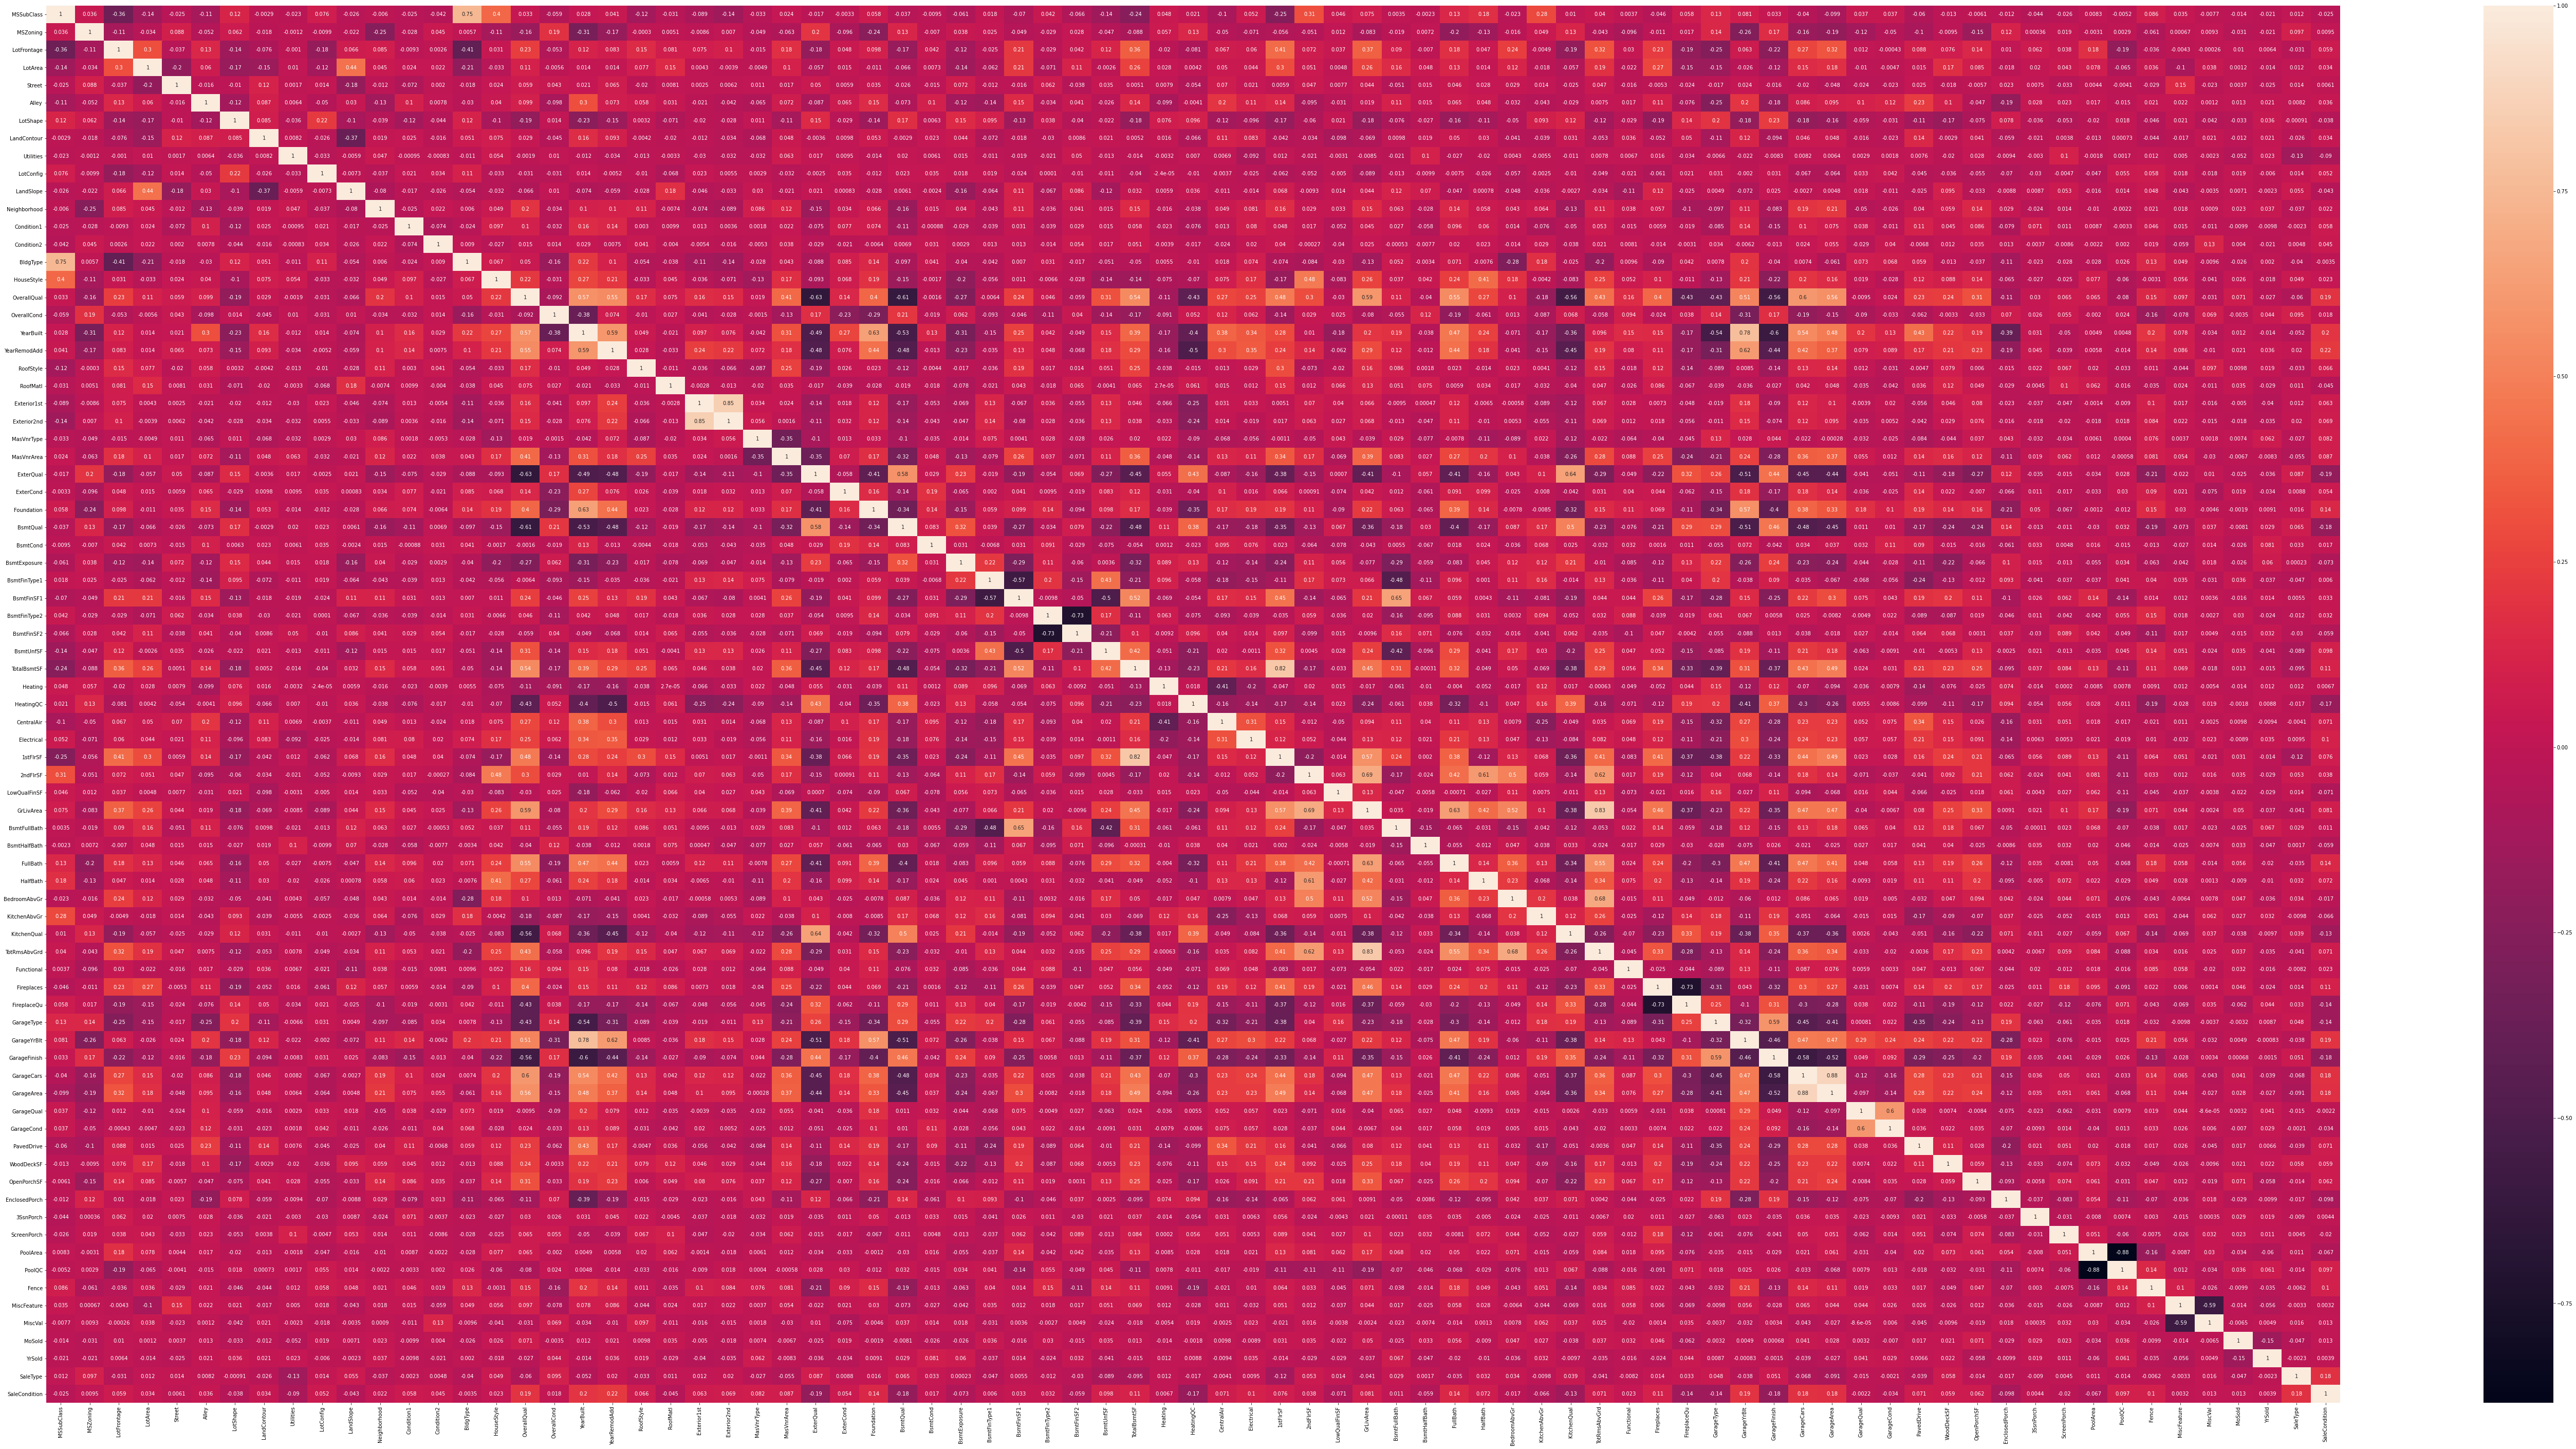

In [38]:
df_cm = pd.DataFrame(corr, index = [i for i in results],
                  columns = [i for i in results])
plt.figure(figsize = (100,50))
sns.heatmap(df_cm, annot=True)
